In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes=load_diabetes()

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
x=diabetes.data

In [6]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
y=diabetes['target']

In [8]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [11]:
x_train.shape

(353, 10)

In [12]:
y_train.shape

(353,)

In [13]:
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.metrics import *

In [14]:
knn_reg=KNeighborsRegressor(n_neighbors=12)

In [15]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=12)

In [16]:
y_pred=knn_reg.predict(x_test)

In [17]:
y_pred_train=knn_reg.predict(x_train)

In [18]:
mean_squared_error(y_test,y_pred)

3293.5010143570535

In [19]:
mean_squared_error(y_train,y_pred_train)

2684.5187283600885

In [20]:
r2_score(y_test,y_pred)

0.43803700522507194

In [21]:
r2_score(y_train,y_pred_train)

0.5413747803213382

In [22]:
#  finding the optimum value of k

In [23]:
k_val=np.arange(1,25)

In [24]:
r2=[]
for k in k_val:
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(x_train,y_train)
    y_pred=knn_reg.predict(x_train)
    r2s=r2_score(y_train,y_pred)
    r2.append(r2s)


Text(0, 0.5, 'r2 score')

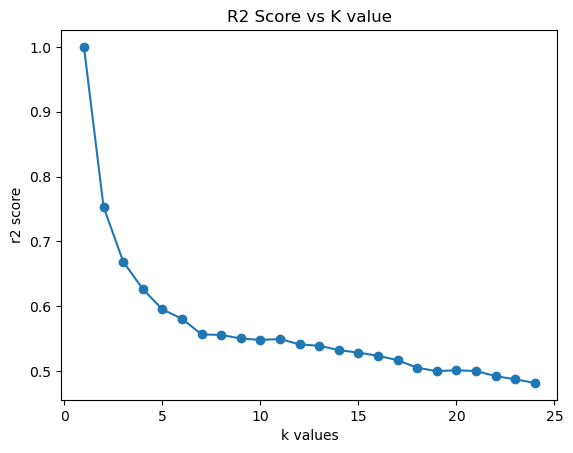

In [25]:
plt.plot(k_val,r2,marker="o", linestyle="-")
plt.title("R2 Score vs K value")
plt.xlabel('k values')
plt.ylabel('r2 score')

In [26]:
# from above plot, K=2  , but to avoid tie situation  , we take  K=3

In [27]:
mse=[]
for k in k_val:
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(x_train,y_train)
    y_pred=knn_reg.predict(x_test)
    ms=mean_squared_error(y_test,y_pred)
    mse.append(ms)

Text(0, 0.5, 'mse score')

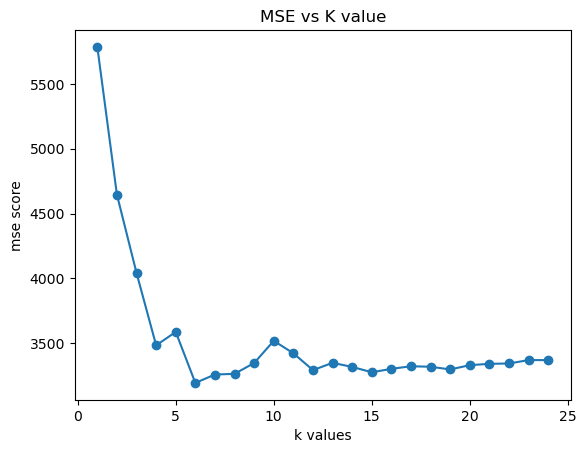

In [28]:
plt.plot(k_val,mse,marker="o", linestyle="-")
plt.title("MSE vs K value")
plt.xlabel('k values')
plt.ylabel('mse score')

In [29]:
# so, k=3